# 台北市道路與車流資料的合併與補值
## 載入必要模組

In [36]:
import pandas as pd
import geopandas as gpd
import numpy as np
%pylab inline
pylab.rcParams['figure.figsize'] = (20.0, 20.0)

Populating the interactive namespace from numpy and matplotlib


## 載入道路資料

In [144]:
two_way_section_data_df = pd.read_pickle('2_way_section_data_df.pickle')
one_way_section_data_df = pd.read_pickle('1_way_section_data_df.pickle')

In [145]:
two_way_section_data_df = gpd.GeoDataFrame(two_way_section_data_df)
one_way_section_data_df = gpd.GeoDataFrame(one_way_section_data_df)

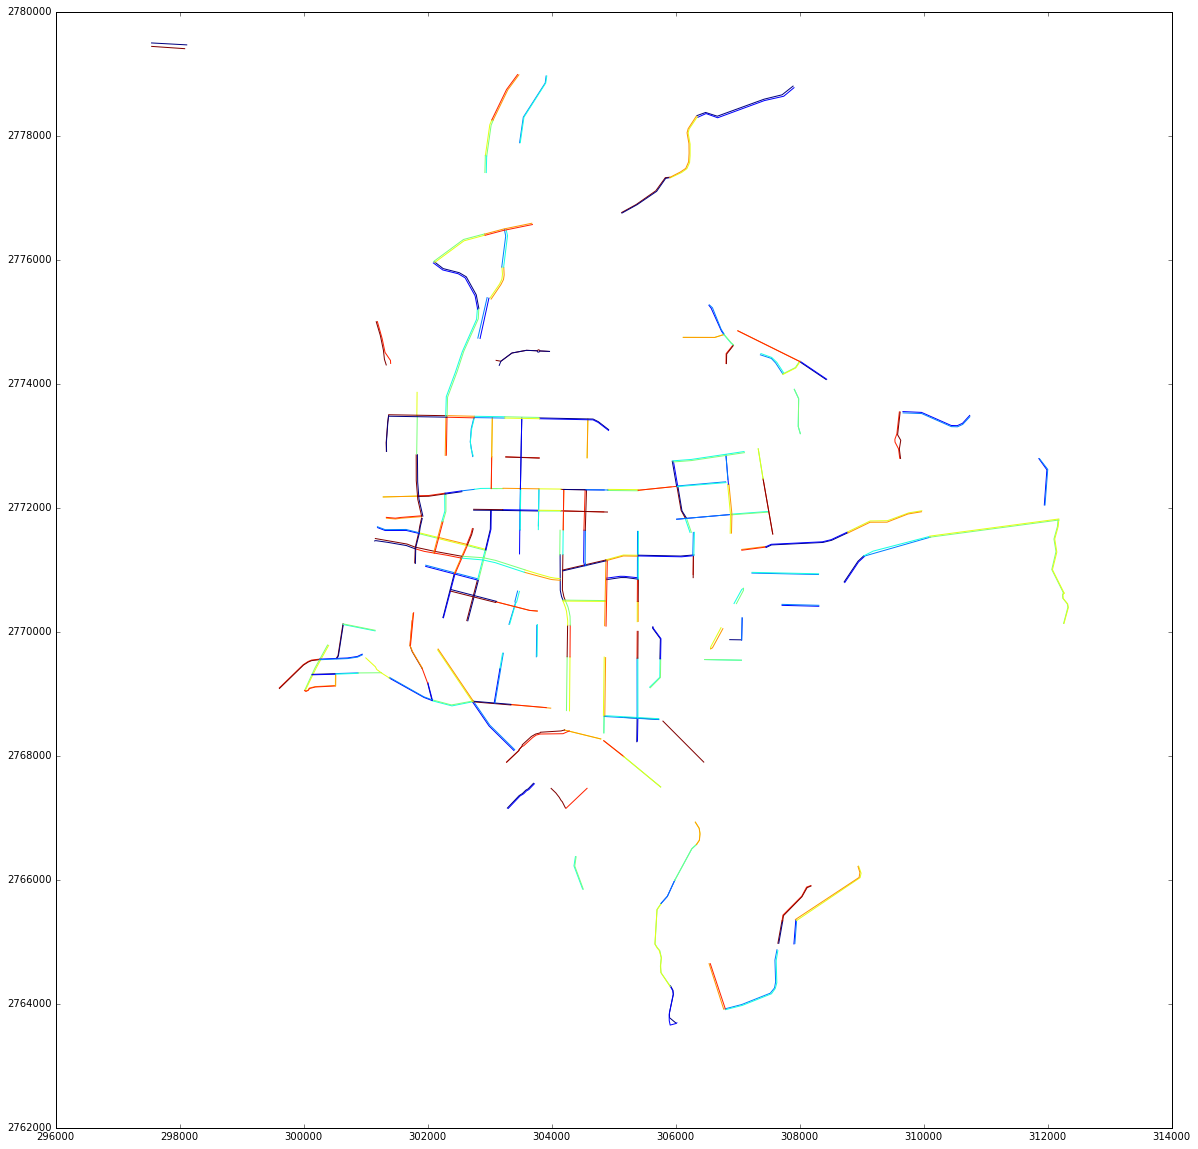

In [39]:
two_way_section_data_df.plot()

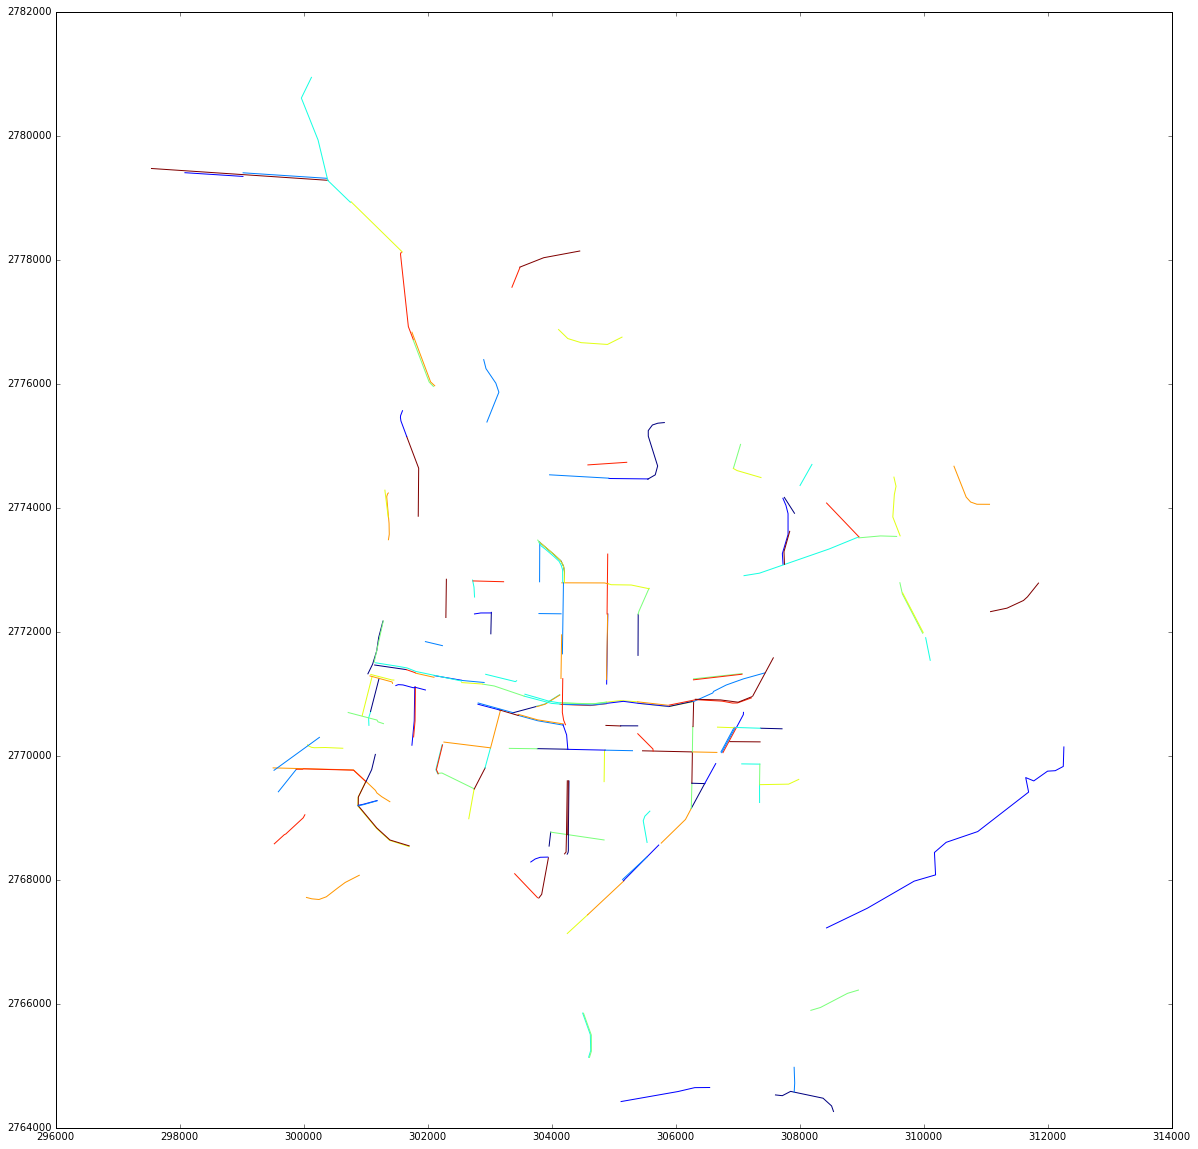

In [146]:
one_way_section_data_df.plot()

## 載入車流資料

In [40]:
car_flow = pd.read_pickle('car_flow.pickle')

### 測試：合併全時段車流

In [41]:
totalVol = car_flow.groupby(by='SectionId', as_index=False)['TotalVol'].sum()

In [42]:
two_way_section_data_with_car_flow = pd.merge(two_way_section_data_df, totalVol, left_on='code', right_on='SectionId')

In [43]:
two_way_section_data_with_car_flow.head(1)

,code,name,start,end,geometry,from,to,set,count,offset,problem,SectionId,TotalVol
0,Z1CPB00,辛亥路,POINT (305169.0000001893 2763898.999857932),POINT (305083.000000146 2764498.999857901),LINESTRING (305997.7734111675 2763692.95661411...,木新路,光輝路,"(光輝路, 木新路)",2,"-2.8376657300218815, -19.797667872874808",False,Z1CPB00,102688.0


In [104]:
group = two_way_section_data_with_car_flow.groupby(by='set', as_index=False)

two_way_section_data_with_car_flow = pd.concat([group[['name', 'geometry']].first(), group[['TotalVol']].sum()], axis=1)

In [105]:
two_way_section_data_with_car_flow = gpd.GeoDataFrame(two_way_section_data_with_car_flow)

/Library/Frameworks/Python.framework/Versions/3.4/lib/python3.4/site-packages/geopandas-0.1.0.dev_320b75d-py3.4.egg/geopandas/plotting.py:225: FutureWarning: 'colormap' is deprecated, please use 'cmap' instead (for consistency with matplotlib)
  "(for consistency with matplotlib)", FutureWarning)


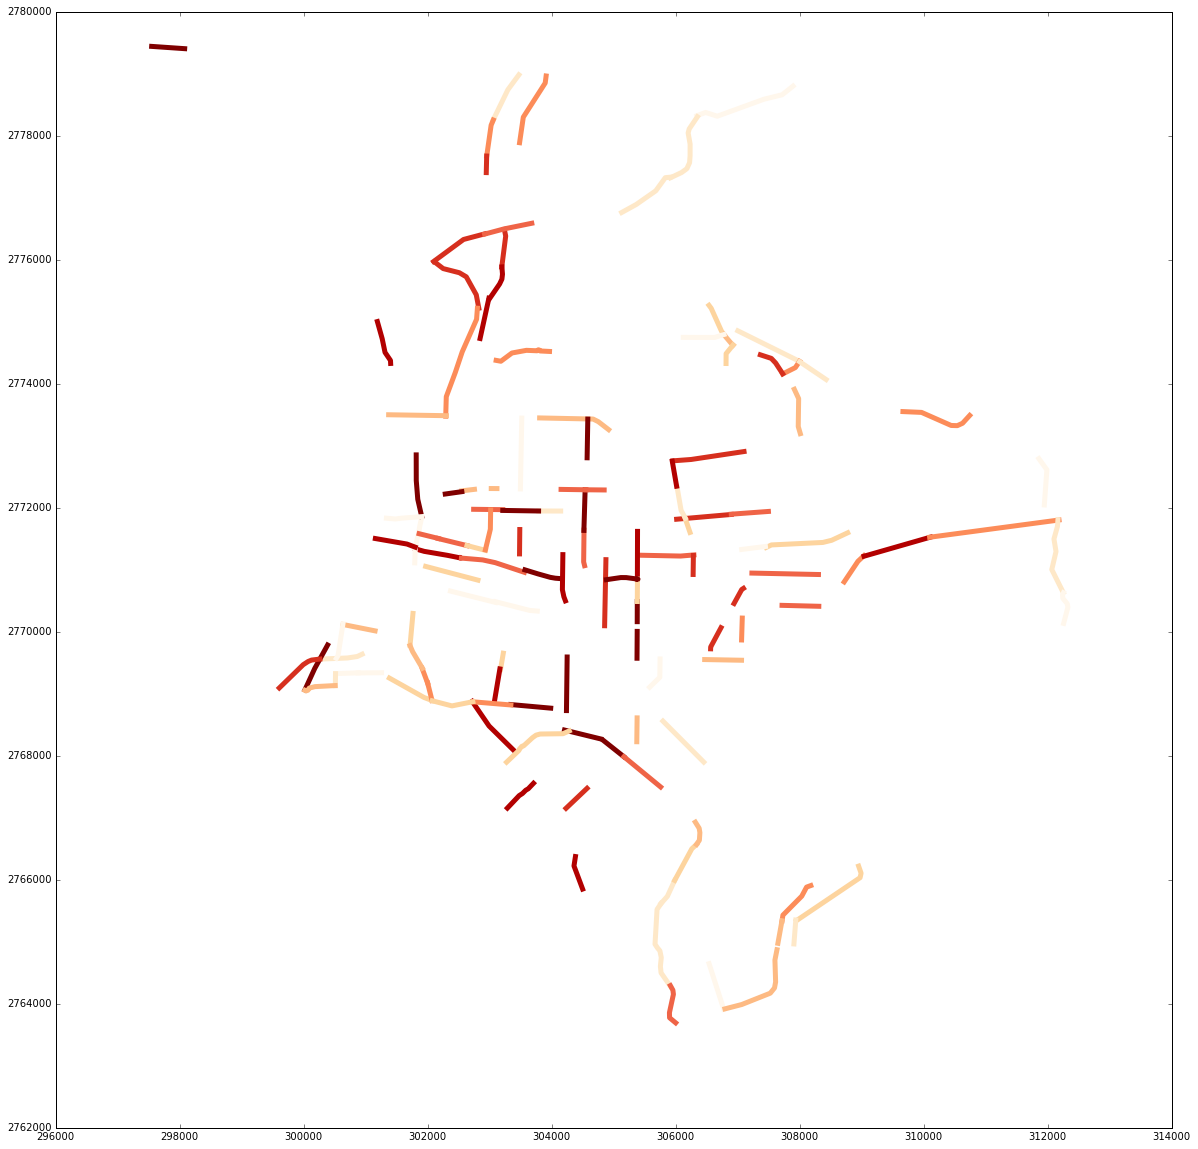

In [106]:
two_way_section_data_with_car_flow.plot(column='TotalVol', scheme='QUANTILES', k=9, colormap='OrRd', linewidth=5)

/Library/Frameworks/Python.framework/Versions/3.4/lib/python3.4/site-packages/geopandas-0.1.0.dev_320b75d-py3.4.egg/geopandas/plotting.py:225: FutureWarning: 'colormap' is deprecated, please use 'cmap' instead (for consistency with matplotlib)
  "(for consistency with matplotlib)", FutureWarning)


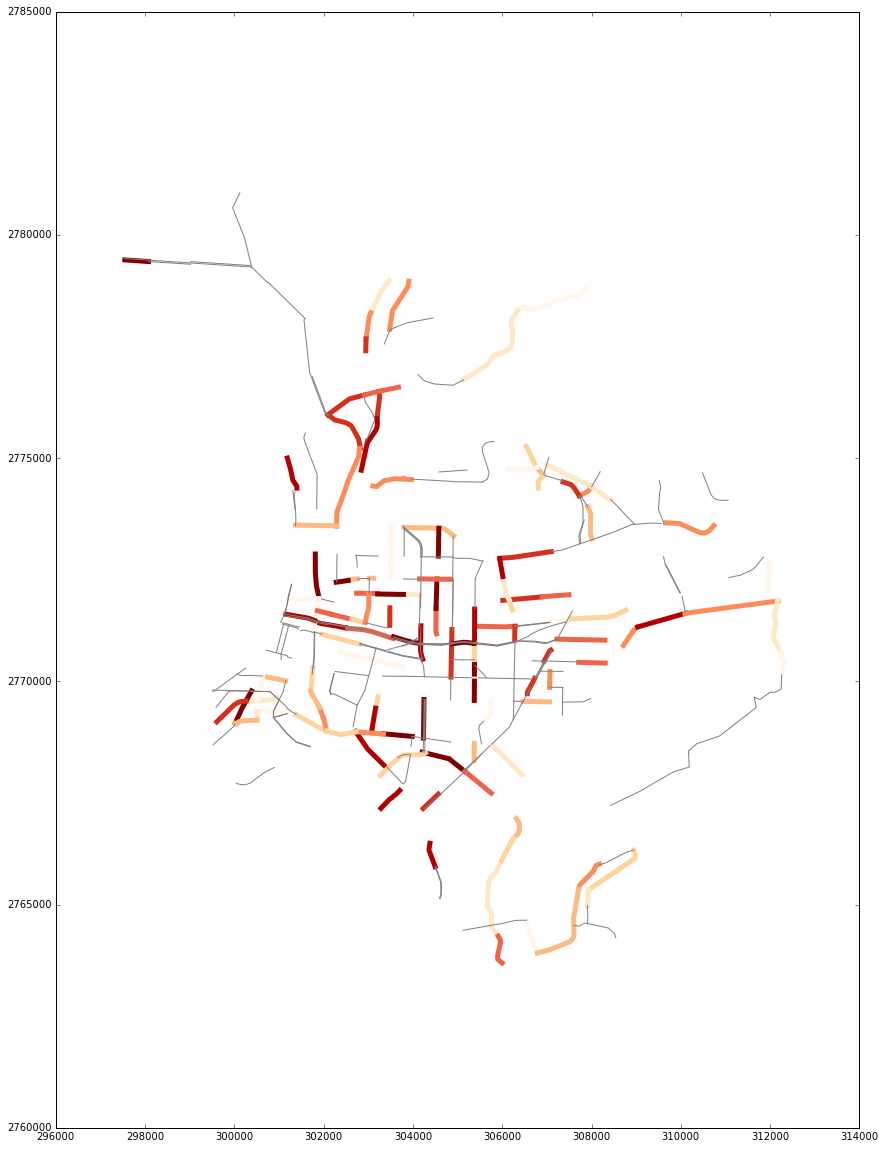

In [156]:
ax = two_way_section_data_with_car_flow.plot(column='TotalVol', scheme='QUANTILES', k=9, colormap='OrRd', linewidth=5)
one_way_section_data_df.plot(ax=ax, color='gray')

In [205]:
all_way_section_data_with_car_flow =pd.concat([two_way_section_data_with_car_flow, one_way_section_data_df])

In [206]:
all_way_section_data_with_car_flow = all_way_section_data_with_car_flow[['name', 'geometry', 'set', 'TotalVol']].copy()

In [207]:
all_way_section_data_with_car_flow = gpd.GeoDataFrame(all_way_section_data_with_car_flow)

In [208]:
all_way_section_data_with_car_flow['centroid'] = all_way_section_data_with_car_flow['geometry'].centroid

In [209]:
all_way_section_data_with_car_flow['x'] = all_way_section_data_with_car_flow.centroid.apply(lambda t: t.x)
all_way_section_data_with_car_flow['y'] = all_way_section_data_with_car_flow.centroid.apply(lambda t: t.y)

In [210]:
road_direction = all_way_section_data_with_car_flow.groupby(by='name')

In [211]:
width = road_direction['x'].max() - road_direction['x'].min() 

In [212]:
height = road_direction['y'].max() - road_direction['y'].min() 

In [213]:
road_direction = pd.DataFrame({
        'width': width, 
        'height': height
    })

In [214]:
road_direction['direction'] = road_direction['height'] - road_direction['width']

In [215]:
def f(t):
    if  t < 0: return '東西向'
    elif t > 0: return '南北向'
    else: return '無'

road_direction['direction'] = road_direction['direction'].apply(f)

In [216]:
road_direction

,height,width,direction
name,,,
三重路,0.000000,0.000000,無
中山南北路,8686.191283,1070.997074,南北向
中正路,274.749384,808.062123,東西向
中華路,829.888865,68.710124,南北向
仁愛路,117.315796,3837.204672,東西向
信義路,12.056875,1310.165578,東西向
健康路,64.983333,740.142888,東西向
光復南北路,3195.926701,304.712467,南北向
八德路,702.051709,4559.928510,東西向


In [299]:
南北向道路 = road_direction[road_direction['direction'] == '南北向'].index

In [300]:
road_df = all_way_section_data_with_car_flow[all_way_section_data_with_car_flow.name.apply(lambda t: t in 南北向道路)]

In [301]:
len(road_df[road_df['TotalVol'].isnull()])

83

/Library/Frameworks/Python.framework/Versions/3.4/lib/python3.4/site-packages/geopandas-0.1.0.dev_320b75d-py3.4.egg/geopandas/plotting.py:225: FutureWarning: 'colormap' is deprecated, please use 'cmap' instead (for consistency with matplotlib)
  "(for consistency with matplotlib)", FutureWarning)


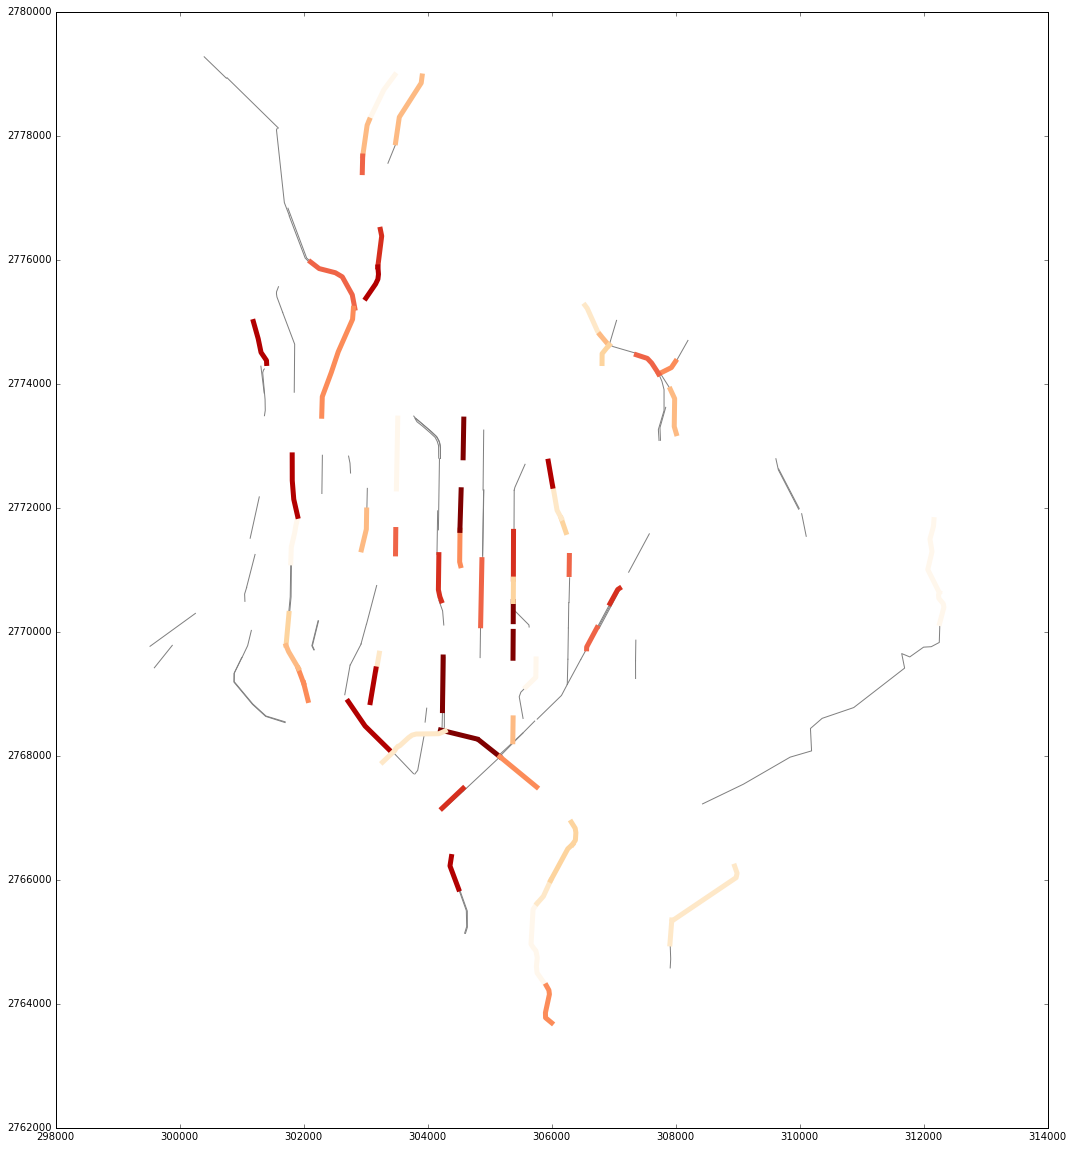

In [302]:
ax = road_df[road_df['TotalVol'].isnull()].plot(color='gray')
road_df[~road_df['TotalVol'].isnull()].plot(column='TotalVol', scheme='QUANTILES', k=9, colormap='OrRd', linewidth=5, ax=ax)

In [303]:
result = gpd.GeoDataFrame()

for road in 南北向道路:
    road_df = all_way_section_data_with_car_flow[all_way_section_data_with_car_flow['name']==road].copy()
    road_df = road_df.sort_values(by='y')
    road_df = road_df.set_index('y')
    road_df['TotalVol'] = road_df[['TotalVol']].apply(pd.Series.interpolate)['TotalVol']
    result = result.append(road_df)

In [304]:
road_df_南北向道路 = gpd.GeoDataFrame(result)

In [305]:
len(result[result['TotalVol'].isnull()])

59

/Library/Frameworks/Python.framework/Versions/3.4/lib/python3.4/site-packages/geopandas-0.1.0.dev_320b75d-py3.4.egg/geopandas/plotting.py:225: FutureWarning: 'colormap' is deprecated, please use 'cmap' instead (for consistency with matplotlib)
  "(for consistency with matplotlib)", FutureWarning)


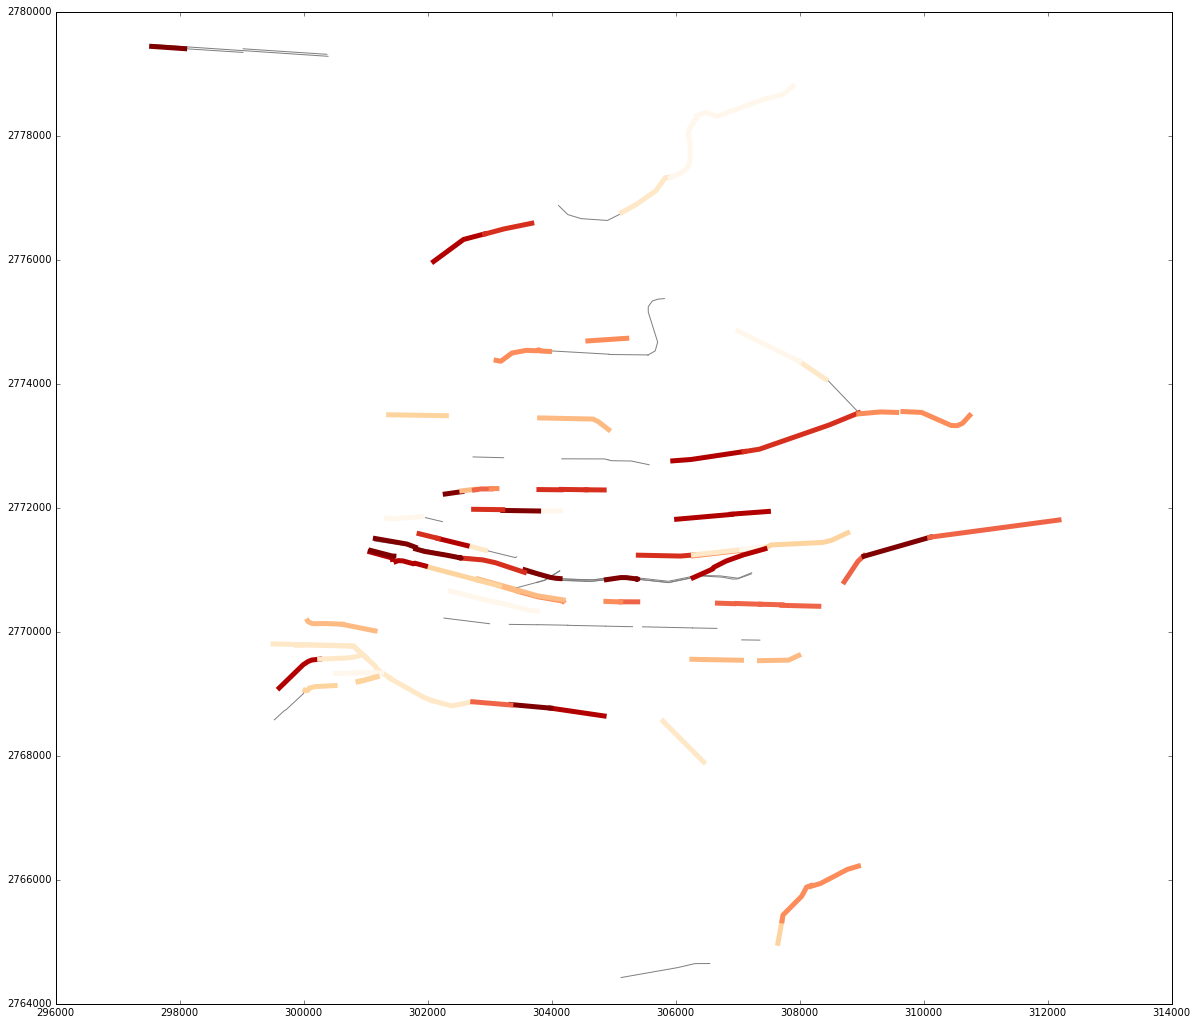

In [291]:
ax = road_df_南北向道路[road_df_南北向道路['TotalVol'].isnull()].plot(color='gray')
road_df_南北向道路[~road_df_南北向道路['TotalVol'].isnull()].plot(column='TotalVol', scheme='QUANTILES', k=9, colormap='OrRd', linewidth=5, ax=ax)

In [276]:
東西向道路 = road_direction[road_direction['direction'] == '東西向'].index

In [277]:
road_df = all_way_section_data_with_car_flow[all_way_section_data_with_car_flow.name.apply(lambda t: t in 東西向道路)]

/Library/Frameworks/Python.framework/Versions/3.4/lib/python3.4/site-packages/geopandas-0.1.0.dev_320b75d-py3.4.egg/geopandas/plotting.py:225: FutureWarning: 'colormap' is deprecated, please use 'cmap' instead (for consistency with matplotlib)
  "(for consistency with matplotlib)", FutureWarning)


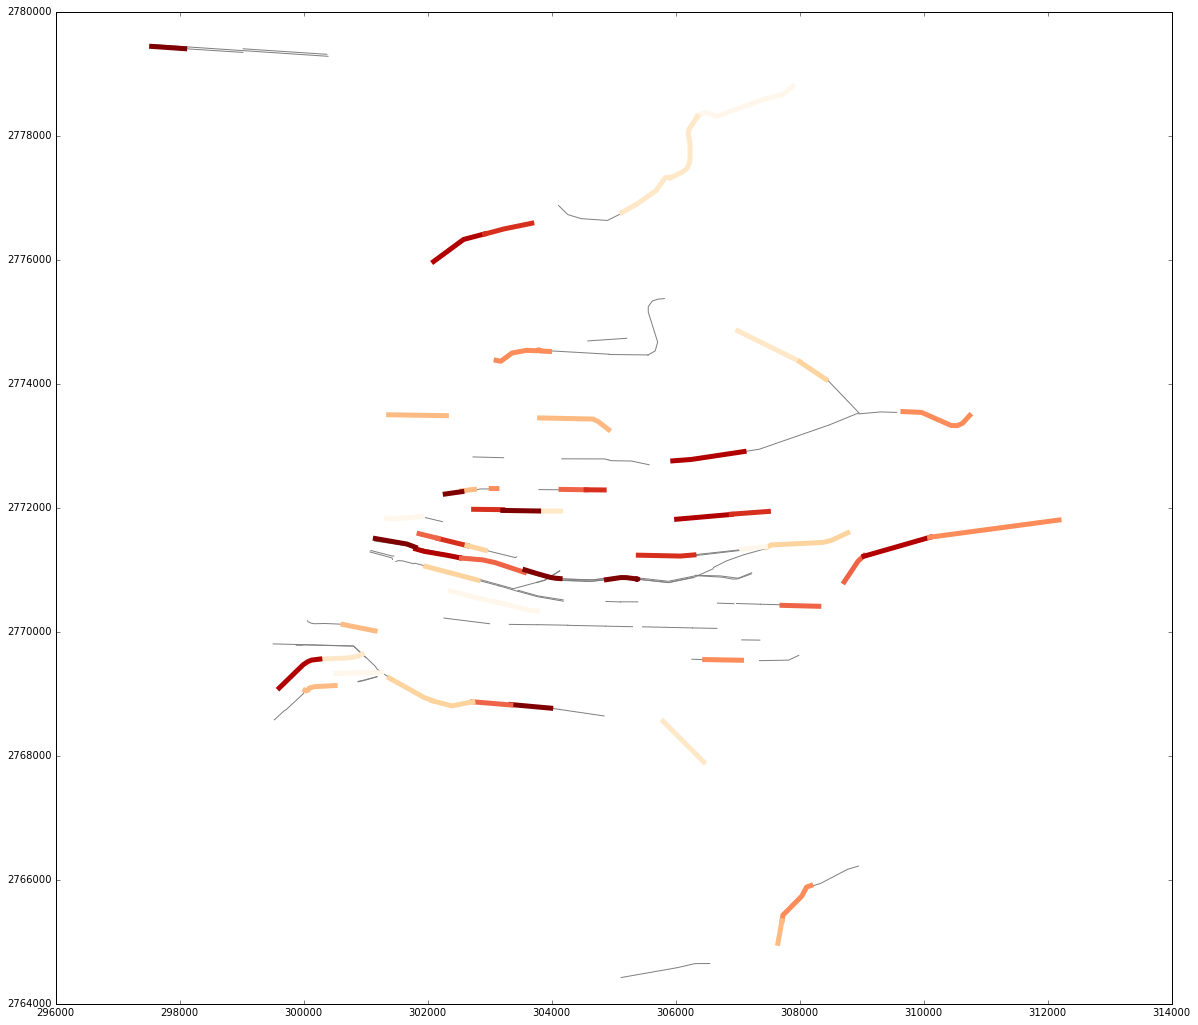

In [278]:
ax = road_df[road_df['TotalVol'].isnull()].plot(color='gray')
road_df[~road_df['TotalVol'].isnull()].plot(column='TotalVol', scheme='QUANTILES', k=9, colormap='OrRd', linewidth=5, ax=ax)

In [279]:
len(road_df[road_df['TotalVol'].isnull()])

79

In [286]:
result = gpd.GeoDataFrame()

for road in 東西向道路:
    road_df = all_way_section_data_with_car_flow[all_way_section_data_with_car_flow['name']==road].copy()
    road_df = road_df.sort_values(by='y')
    road_df = road_df.set_index('y')
    road_df['TotalVol'] = road_df[['TotalVol']].apply(pd.Series.interpolate)['TotalVol']
    result = result.append(road_df)

In [287]:
road_df_東西向道路 = gpd.GeoDataFrame(result)

/Library/Frameworks/Python.framework/Versions/3.4/lib/python3.4/site-packages/geopandas-0.1.0.dev_320b75d-py3.4.egg/geopandas/plotting.py:225: FutureWarning: 'colormap' is deprecated, please use 'cmap' instead (for consistency with matplotlib)
  "(for consistency with matplotlib)", FutureWarning)


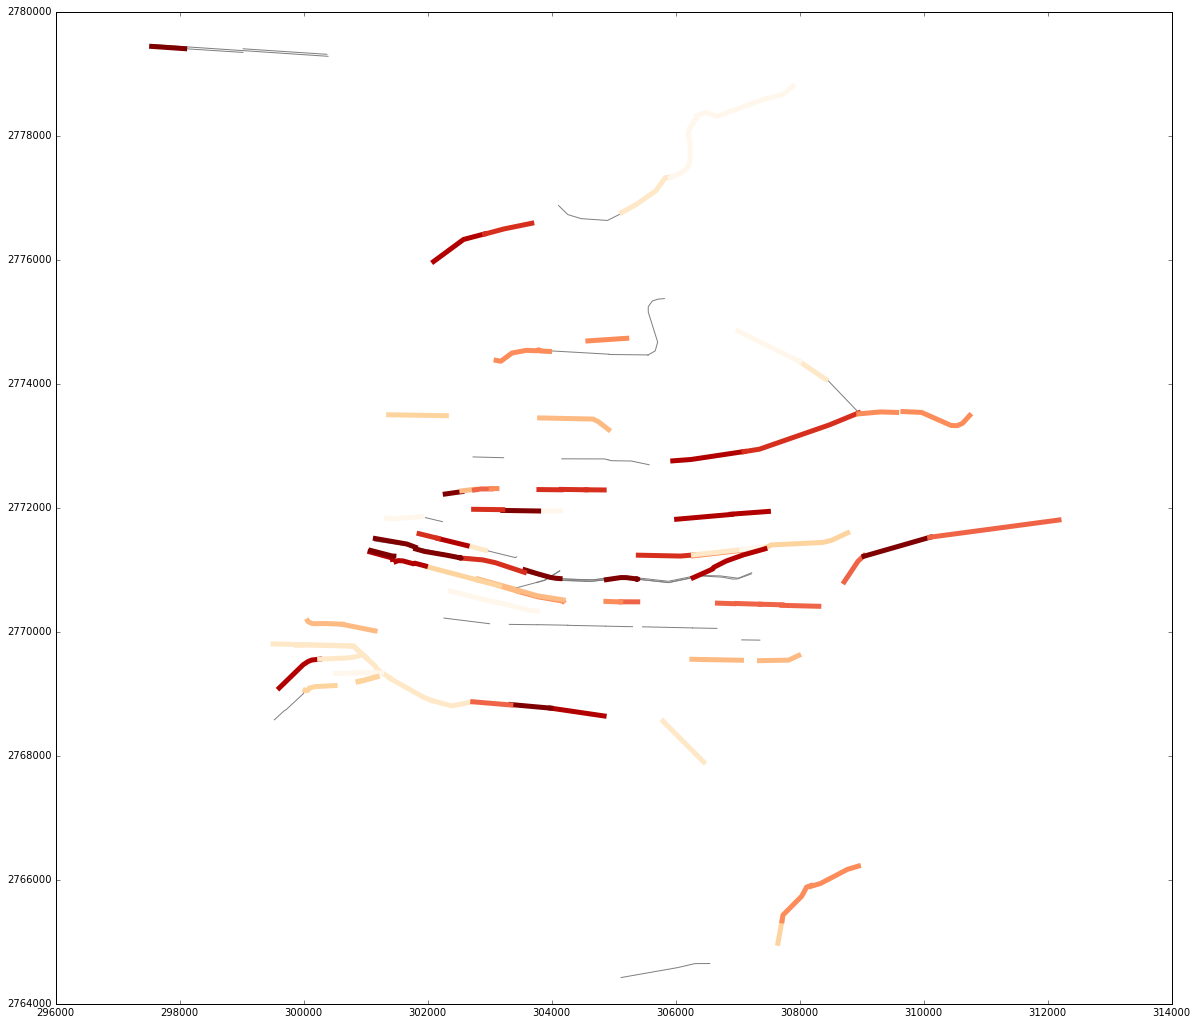

In [289]:
ax = road_df_東西向道路[road_df_東西向道路['TotalVol'].isnull()].plot(color='gray')
road_df_東西向道路[~road_df_東西向道路['TotalVol'].isnull()].plot(column='TotalVol', scheme='QUANTILES', k=9, colormap='OrRd', linewidth=5, ax=ax)

In [280]:
len(result[result['TotalVol'].isnull()])

48

In [ ]:
road_df_無 = all_way_section_data_with_car_flow[all_way_section_data_with_car_flow.name.apply(lambda t: t in 無)]

In [297]:
road_df = gpd.GeoDataFrame(pd.concat([road_df_南北向道路, road_df_東西向道路]))

/Library/Frameworks/Python.framework/Versions/3.4/lib/python3.4/site-packages/geopandas-0.1.0.dev_320b75d-py3.4.egg/geopandas/plotting.py:225: FutureWarning: 'colormap' is deprecated, please use 'cmap' instead (for consistency with matplotlib)
  "(for consistency with matplotlib)", FutureWarning)


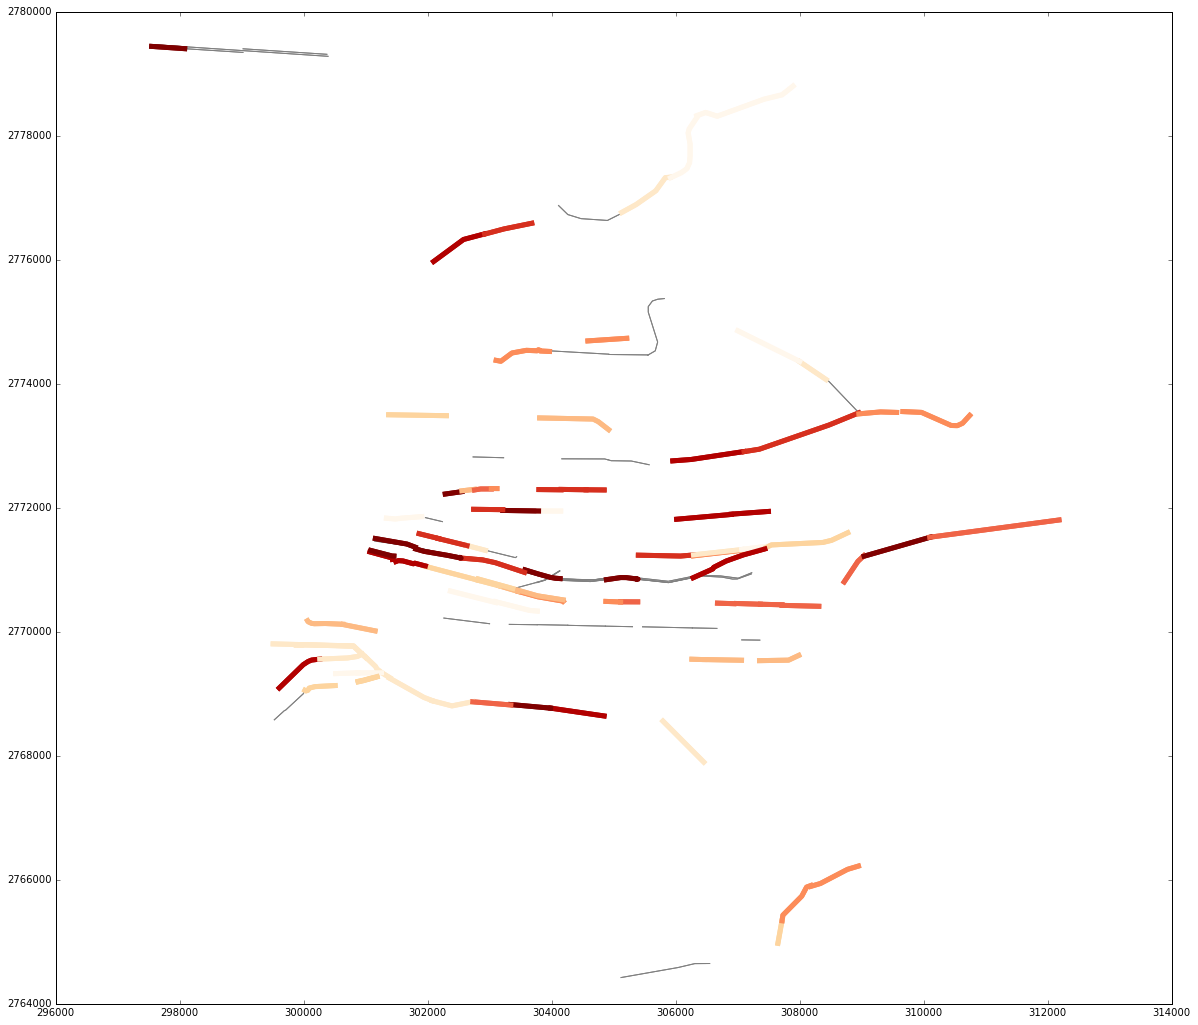

In [298]:
ax = road_df[road_df['TotalVol'].isnull()].plot(color='gray')
road_df[~road_df['TotalVol'].isnull()].plot(column='TotalVol', scheme='QUANTILES', k=9, colormap='OrRd', linewidth=5, ax=ax)